In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [21]:
nd = 8

In [22]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)

(25, 16)


In [4]:
b = [] 
for l in open("test.txt","r").readlines()[0::2]: 
    b.append([float(x) for x in l.split(",")[:-1]])
arr2 = np.array(b); print(arr2.shape)

(11840, 18)


In [23]:
arr[0]

array([-0.0531029 , -0.0404975 , -0.00594276, -0.04075   , -0.052687  ,
        0.00649628, -0.00545959,  0.00595738,  0.0413381 , -0.0409806 ,
        0.0409314 ,  0.00627312, -0.00540553,  0.0520061 ,  0.0404678 ,
        0.0523709 ])

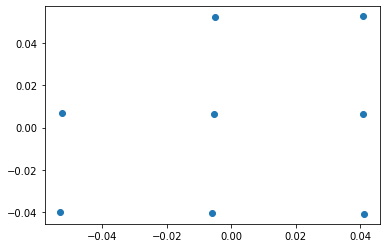

In [24]:
xi = arr[1][-2*nd::2]; yi = arr[1][-2*nd+1::2];
plt.scatter(xi,yi)

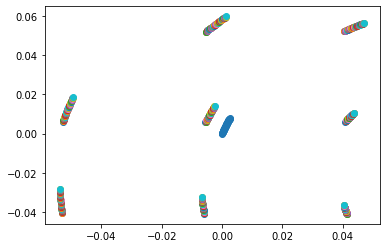

In [75]:
for i in range(0,len(arr)):
    xi = arr[i][-2*nd::2]; yi = arr[i][-2*nd+1::2];
    plt.scatter(xi,yi)
#plt.scatter(*np.mean([arr[:,::2],arr[:,1::2]],axis=2))
#plt.scatter(arr1[:,0],arr1[:,1])
plt.scatter(df["comx"],df["comy"])

In [76]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:]])
arr1 = np.array(a); print(arr1.shape)

ValueError: could not convert string to float: ''

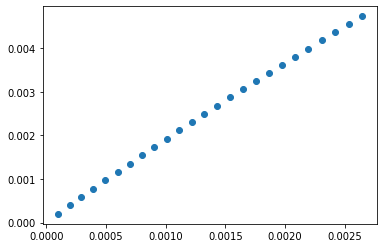

In [53]:
plt.scatter(arr1[:,0],arr1[:,1])

In [51]:
indexer = arr[:,-2*nd+1] > 0.0241
plt.scatter(arr[:,0][indexer],arr[:,2*nd+1][indexer])  # only upper part close to max

IndexError: index 17 is out of bounds for axis 1 with size 16

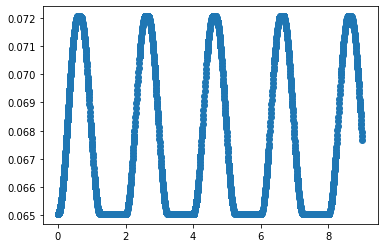

In [490]:
plt.scatter(arr[:,0],arr2[:,1])  # l0 (actuation function)

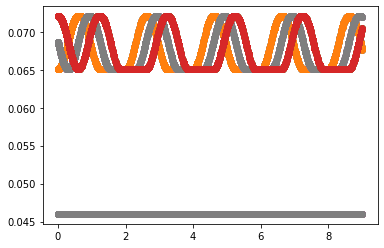

In [491]:
[plt.scatter(arr[:,0],arr2[:,i]) for i in range(len(arr2[0]))]

In [493]:
max(arr[:,0])

9.00249

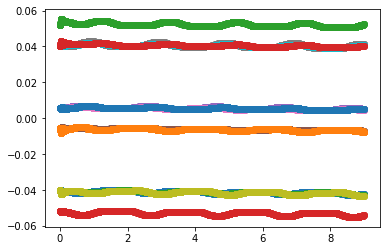

In [528]:
[plt.scatter(arr[:,0],arr[:,i]) for i in range(2*nd+2,4*nd)]

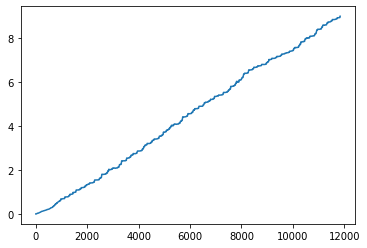

In [529]:
plt.plot(arr[:,0])

In [6]:
nd=8

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [30]:
a = [] 
for l in open("test.txt","r").readlines()[::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:]])
arr2 = np.array(a); print(arr2.shape)

(50, 17)
(50, 3)


In [31]:
sol_col = np.array([[f"x{i}", f"y{i}"] for i in range(nd)]).flatten().tolist()
df = pd.DataFrame(arr,columns=["t"] + sol_col)
df = df.assign(comx=df[sol_col[::2]].mean(axis=1),comy=df[sol_col[1::2]].mean(axis=1))
df = df.assign(vx=[0] + [(df.comx[i]-df.comx[i-1])/(df.t[i]-df.t[i-1]) for i in range(1,len(df.comx))])
shifted = np.array([x.to_numpy()-df[["comx","comy"]].to_numpy() for x in np.split(df[sol_col],nd,axis=1)])
df = df.assign(angle=(-np.mean([np.unwrap([np.arctan2(*r)-np.arctan2(*v[0]) for r in v]) 
                            for v in shifted],axis=0))) # no mod 2 pi here because small change, also everything in radiants 

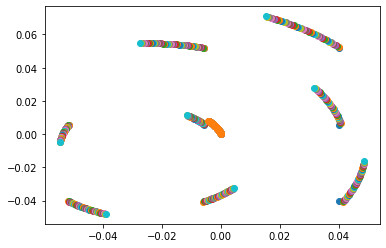

In [32]:
for i in range(0,len(arr)):
    xi = arr[i][-2*nd::2]; yi = arr[i][-2*nd+1::2];
    plt.scatter(xi,yi)
plt.scatter(np.mean(arr[:,1::2],axis=1),np.mean(arr[:,2::2],axis=1))
plt.scatter(arr2[:,0],arr2[:,1])

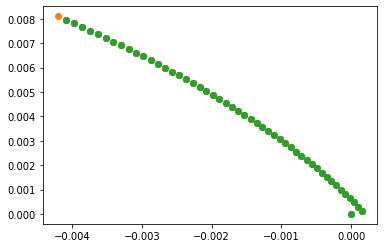

In [33]:
plt.scatter(np.mean(arr[:,1::2],axis=1),np.mean(arr[:,2::2],axis=1))
plt.scatter(arr2[:,0],arr2[:,1])
plt.scatter(df["comx"],df["comy"])

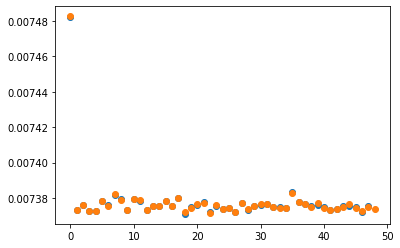

In [12]:
plt.scatter(np.arange(len(df)-2),np.diff(df["angle"][1:]))
plt.scatter(np.arange(len(arr2)-1),arr2[1:,2])

In [13]:
np.mean(np.diff(df["angle"])),np.mean(arr2[:,2])

(0.007309973893115441, 0.007311234400000001)

In [14]:
tpl = (df["angle"].tolist()[-1],arr[-1,2])

In [23]:
def phase_heatmap(df, colname, ax, title, size=110, minv=None, maxv=None, phase1="phase 0", phase2="phase 1"):
    if minv == None and maxv == None: 
        minv = df[colname].min(); maxv = df[colname].max()
    ax.set(xlim=(0,2),ylim=(0,2),title=title); ax.set_aspect(1)
    ax.scatter(df[phase1], df[phase2], cmap=mpl.colormaps["plasma"],marker="s",
        c=mpl.colors.Normalize(minv,maxv)(df[colname]),s=size)
    divider = make_axes_locatable(ax); cax = divider.append_axes("right", size="5%", pad=0.05)
    ColorbarBase(cax,cmap=mpl.colormaps["plasma"],norm=mpl.colors.Normalize(minv,maxv))

In [173]:
a = []
for l in open("test4.txt","r").readlines(): 
    a.append([float(x) for x in l.split(",")[:-1]])
df = pd.DataFrame(np.array(a),columns=["phase 2","phase 1","phase 0","d_comx","d_comy","d_theta"])
ix = ["d_comx","d_comy"]
df[ix] = df[ix][(df[ix] > -0.001) & (df[ix] < 0.001)]
df["d_theta"] = df["d_theta"][(df["d_theta"] > -0.1) & (df["d_theta"] < 0.1)]

In [174]:
df

,phase 2,phase 1,phase 0,d_comx,d_comy,d_theta
0,0.0,0.00,0.00,0.000002,1.596350e-06,0.000000e+00
1,0.0,0.00,0.04,-0.000008,4.674670e-06,0.000000e+00
2,0.0,0.00,0.08,-0.000021,7.824800e-06,0.000000e+00
3,0.0,0.00,0.12,-0.000037,1.153660e-05,0.000000e+00
4,0.0,0.00,0.16,-0.000057,1.627820e-05,0.000000e+00
...,...,...,...,...,...,...
2495,0.0,1.96,1.80,0.000051,-8.014010e-06,4.359080e-05
2496,0.0,1.96,1.84,0.000037,-4.076520e-07,7.475000e-05
2497,0.0,1.96,1.88,0.000025,6.094660e-06,5.107000e-05
2498,0.0,1.96,1.92,0.000016,8.364720e-06,2.276800e-05


In [175]:
df_true = pd.read_csv("../../data/experiment_files/19_12_2022/displacement_map_triangle_[1, 1, 1].csv")

In [176]:
df_true

,Unnamed: 0,phase 0,phase 1,phase 2,d_theta,d_comx,d_comy
0,0,0.0,0.000000,0,5.577395e-09,0.000007,-0.000007
1,1,0.0,0.040816,0,-4.882317e-05,0.000017,-0.000002
2,2,0.0,0.081633,0,-1.044656e-04,0.000029,0.000002
3,3,0.0,0.122449,0,-1.434292e-04,0.000044,0.000007
4,4,0.0,0.163265,0,-1.513382e-04,0.000064,0.000012
...,...,...,...,...,...,...,...
2495,2495,2.0,1.836735,0,9.945090e-05,-0.000046,-0.000040
2496,2496,2.0,1.877551,0,6.325040e-05,-0.000031,-0.000029
2497,2497,2.0,1.918367,0,2.303680e-05,-0.000018,-0.000020
2498,2498,2.0,1.959184,0,1.026369e-05,-0.000004,-0.000013


In [179]:
df_rot = df.copy(); df_rot[["d_comx","d_comy"]] = [rot(x,np.pi/2) for x in df[["d_comx","d_comy"]].to_numpy()]


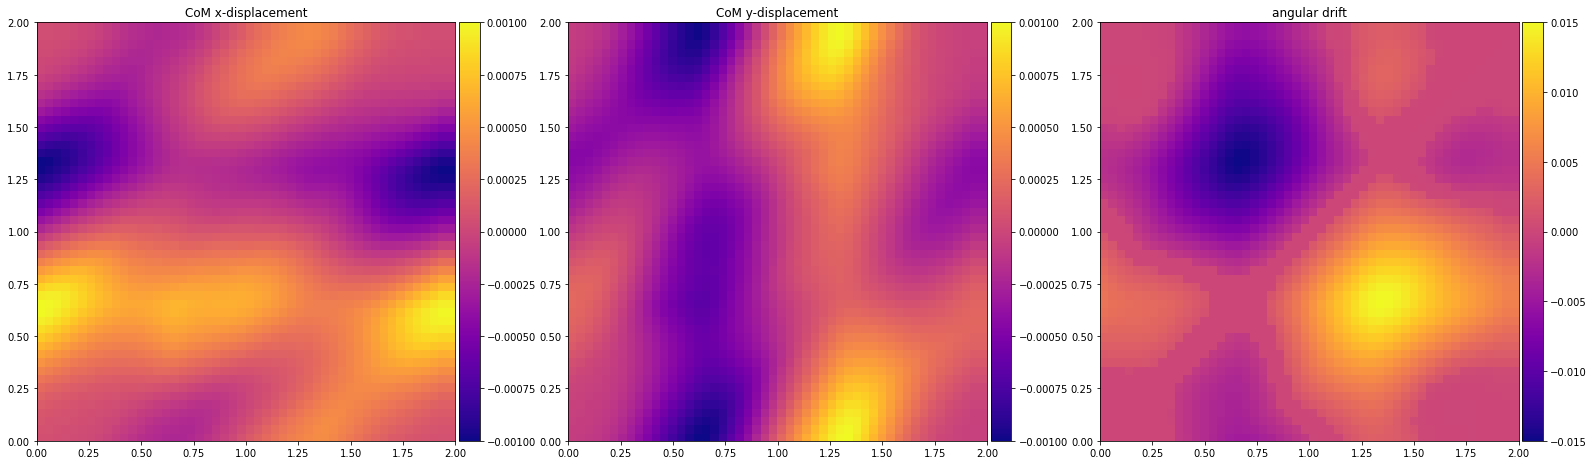

In [180]:
mi = -0.001; ma = 0.001
fig, ax = plt.subplots(1,3,figsize=(27,9));
phase_heatmap(df_rot,"d_comx",ax[0],"CoM x-displacement",size=300,minv=mi,maxv=ma)
phase_heatmap(df_rot,"d_comy",ax[1],"CoM y-displacement",size=300,minv=mi,maxv=ma)
phase_heatmap(df_rot,"d_theta",ax[2],"angular drift",size=300,minv=-0.015,maxv=0.015)

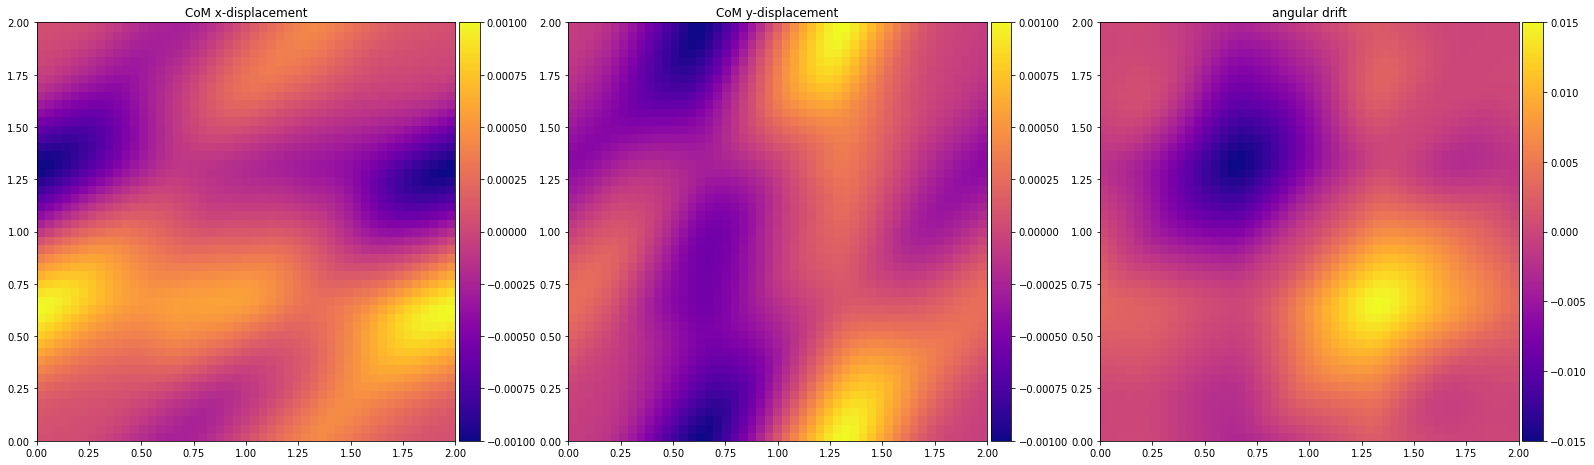

In [172]:
fig, ax = plt.subplots(1,3,figsize=(27,9));
phase_heatmap(df_true,"d_comx",ax[0],"CoM x-displacement",size=300,minv=mi,maxv=ma)
phase_heatmap(df_true,"d_comy",ax[1],"CoM y-displacement",size=300,minv=mi,maxv=ma)
phase_heatmap(df_true,"d_theta",ax[2],"angular drift",size=300,minv=-0.015,maxv=0.015)

In [53]:
def rot(v,theta):
    c, s = np.cos(theta), np.sin(theta); R = np.array(((c, -s), (s, c))); return np.dot(R,v)

In [105]:
sol_col = np.array([[f"x{i}", f"y{i}"] for i in range(nd)]).flatten().tolist()
df = pd.DataFrame(arr,columns=["t"] + sol_col)
df = df.assign(comx=df[sol_col[::2]].mean(axis=1),comy=df[sol_col[1::2]].mean(axis=1))
df = df.assign(vx=[0] + [(df.comx[i]-df.comx[i-1])/(df.t[i]-df.t[i-1]) for i in range(1,len(df.comx))])
shifted = np.array([x.to_numpy()-df[["comx","comy"]].to_numpy() for x in np.split(df[sol_col],nd,axis=1)])
df = df.assign(angle=(-np.mean([np.unwrap([np.arctan2(*r)-np.arctan2(*v[0]) for r in v]) 
                            for v in shifted],axis=0))) # no mod 2 pi here because small change, also everything in radiants 